In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import seaborn as sns

# Import the NaMaster python wrapper
import pymaster as nmt

Simple example showcasing the use of NaMaster to compute the pseudo-Cl estimator of the angular cross-power spectrum of a spin-0 field and a spin-2 field

In [3]:
# HEALPix resolution parameter used here
nside = 256

In [5]:
# Read mask and apodize it on a scale of ~1deg
mask = nmt.mask_apodization(
    hp.read_map("../test/mask.fits",verbose=False),
    1.,
    apotype="Smooth")

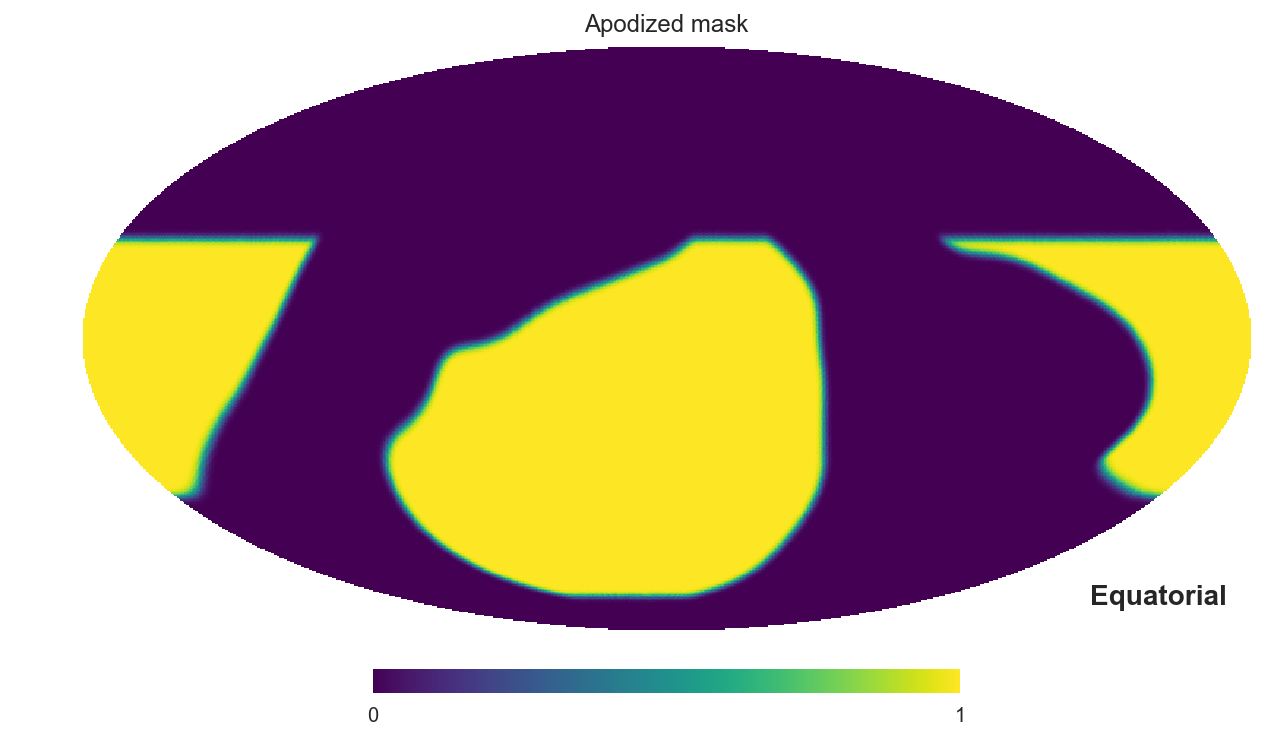

In [10]:
hp.mollview(mask,coord=['G','C'], title='Apodized mask', cmap='viridis')

In [12]:
# Read healpix maps and initialize a spin-0 and spin-2 field
f_0=nmt.NmtField(mask, [hp.read_map("../test/maps.fits", field=0, verbose=False)])
f_2=nmt.NmtField(mask, hp.read_map("../test/maps.fits", field=[1,2], verbose=False))

In [13]:
# Initialize binning scheme with 4 ells per bandpower
b = nmt.NmtBin(nside, nlb=4)

In [14]:
# Compute MASTER estimator
# spin-0 x spin-0
cl_00 = nmt.compute_full_master(f_0,f_0,b)

# spin-0 x spin-2
cl_02 = nmt.compute_full_master(f_0, f_2,b)

# spin-2 x spin-2
cl_22 = nmt.compute_full_master(f_2, f_2,b)

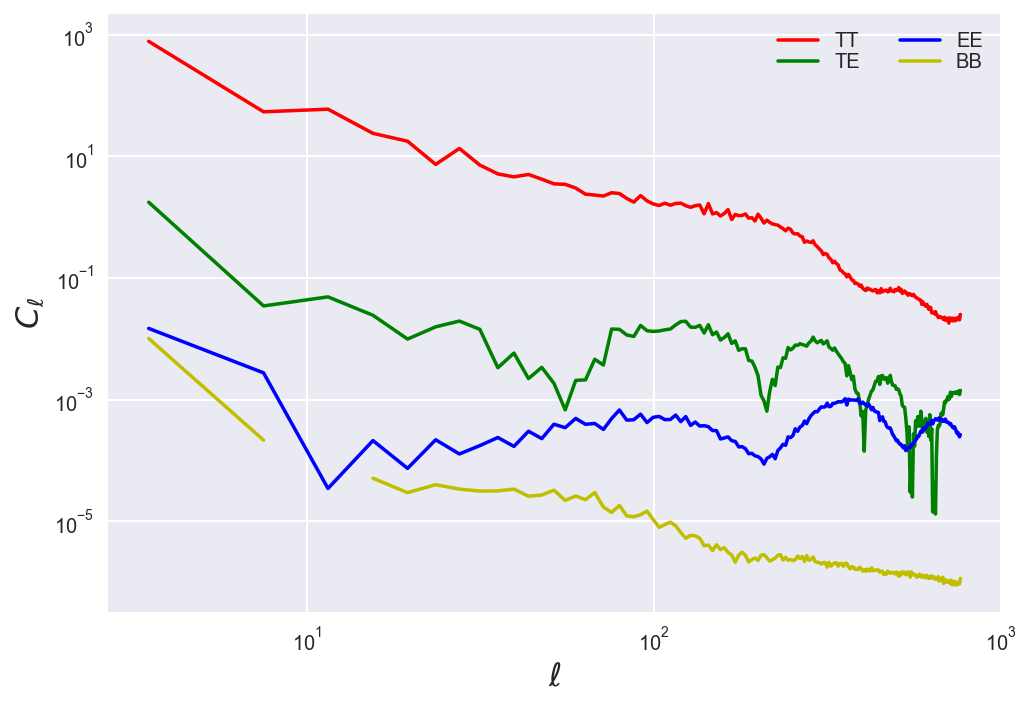

In [16]:
# Plot results
ell_arr = b.get_effective_ells()

# TT
plt.plot(ell_arr, cl_00[0], 'r-',label='TT')
# TE
plt.plot(ell_arr, np.fabs(cl_02[0]), 'g-', label='TE')
# EE
plt.plot(ell_arr, cl_22[0], 'b-', label='EE')
# BB
plt.plot(ell_arr,cl_22[3], 'y-', label='BB')

# logscale
plt.loglog()

# labels & legend
plt.xlabel('$\\ell$',fontsize=16)
plt.ylabel('$C_\\ell$',fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1);